<a href="https://colab.research.google.com/github/sanyagupta31/Data-analysis/blob/main/covid_19_data_analyisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib seaborn

In [2]:
import zipfile
import os
zip="/content/covid_19_data.csv.zip"
with zipfile.ZipFile(zip,'r') as zip_ref:
  zip_ref.extractall('/content')
os.remove(zip)
print('file is extracted')


file is extracted


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/covid_19_data.csv')
print(df.head())
print(df.info())

   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   C

In [5]:
#data cleaning
print(df.isnull().sum())


SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


In [9]:
df['Province/State'].fillna('Unknown',inplace=True)
print(df.isnull().sum())

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64


<ipython-input-9-7e81d414ab96>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Province/State'].fillna('Unknown',inplace=True)


In [10]:
df['ObservationDate']=pd.to_datetime(df['ObservationDate'])
print(df.dtypes)

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object


In [12]:
df['Active']=df['Confirmed']-(df['Deaths']+df['Recovered'])


In [14]:
# Group by 'Country/Region' and 'ObservationDate', then sum numeric columns
country_data = (
    df.groupby(['Country/Region', 'ObservationDate'])[['Confirmed', 'Deaths', 'Recovered', 'Active']]
    .sum()
    .reset_index()
)

print(country_data.head())


    Country/Region ObservationDate  Confirmed  Deaths  Recovered  Active
0       Azerbaijan      2020-02-28        1.0     0.0        0.0     1.0
1  ('St. Martin',)      2020-03-10        2.0     0.0        0.0     2.0
2      Afghanistan      2020-02-24        1.0     0.0        0.0     1.0
3      Afghanistan      2020-02-25        1.0     0.0        0.0     1.0
4      Afghanistan      2020-02-26        1.0     0.0        0.0     1.0


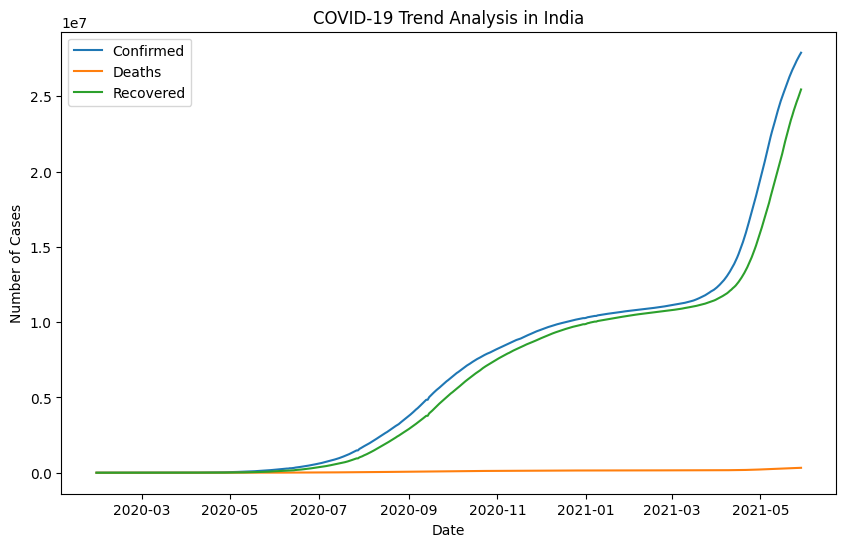

In [15]:
#trend analysis
india_data=country_data[country_data['Country/Region']=='India']
plt.figure(figsize=(10,6))
plt.plot(india_data['ObservationDate'],india_data['Confirmed'],label='Confirmed')
plt.plot(india_data['ObservationDate'],india_data['Deaths'],label='Deaths')
plt.plot(india_data['ObservationDate'],india_data['Recovered'],label='Recovered')
plt.legend()
plt.title('COVID-19 Trend Analysis in India')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()

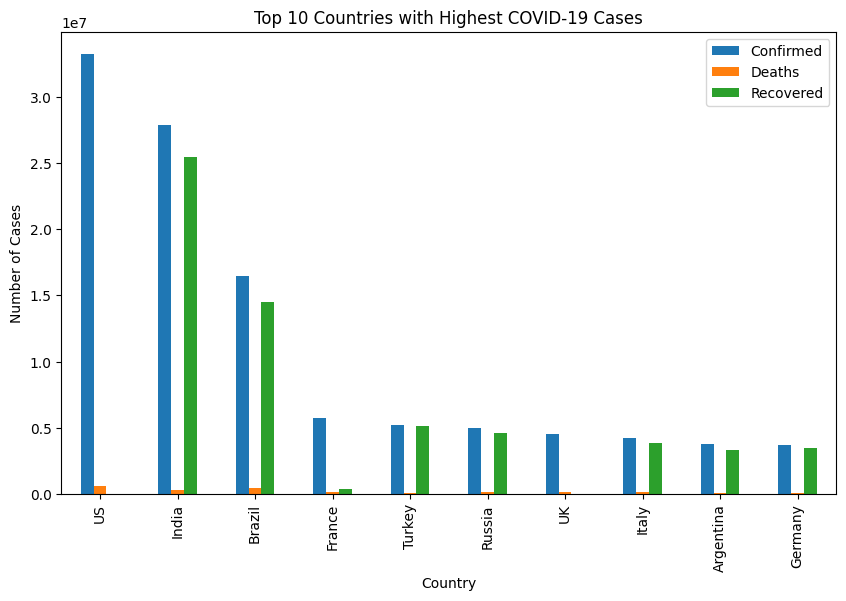

In [19]:
latest_data=df[df['ObservationDate']==df['ObservationDate'].max()]
top_countries=latest_data.groupby('Country/Region')[['Confirmed','Deaths','Recovered']].sum().sort_values(by=['Confirmed'], ascending=False).head(10)
top_countries.plot(kind='bar',figsize=(10,6))
plt.title('Top 10 Countries with Highest COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.show()

In [20]:
#saved the cleaned data
df.to_csv('cleaned_covid_data.csv',index=False)